<h3><i><b> PYTORCH - Training on MNIST Dataset </h3>
<h4> Session 6 </h4>


### Imports <hr>

In [1]:
# Pytorch imports
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
#!pip install torchsummary
from torchsummary import summary

# Loading classes from py files
from model import Net, ModelTraining
from utils import Utility

Class Object Initialization

In [2]:
# creating class objects
get_utilitites= Utility()

model_train = ModelTraining()

##### Check device support CPU/GPU <hr> 

In [3]:
device = Utility.set_cuda_if_available()
print(f'Device available for the script - {device}')

CUDA Available? <function is_available at 0x000001F450A1DB40>
Device available for the script - cuda


##### Define dataset class for creating train/test loaders <hr>


In [4]:
class Dataset():
    """
    This class defines the train/test transforms for our CNN model for MNIST dataset
    """
    def __init__(self, batch_size):
        
        self.batch_size = batch_size
        self.kwargs = {'batch_size': batch_size, 'shuffle': True, 'num_workers': 2, 'pin_memory': True}

        self.train_transforms = transforms.Compose([
            transforms.RandomApply([transforms.CenterCrop(22), ], p=0.1),
            transforms.Resize((28, 28)),
            transforms.RandomRotation((-15., 15.), fill=0),
            transforms.ToTensor(),
            transforms.Normalize((0.1307,), (0.3081,)),
            ])

        # Test data transformations
        self.test_transforms = transforms.Compose([
            transforms.ToTensor(),
            transforms.Normalize((0.1307,), (0.3081,))
            ])

    def train_loader(self):
        return torch.utils.data.DataLoader(datasets.MNIST('../data', train=True, download=True, transform=self.train_transforms), **self.kwargs) 

    def test_loader(self):
        return torch.utils.data.DataLoader(datasets.MNIST('../data', train=False, download=True, transform=self.test_transforms), **self.kwargs) 

##### Create Batch loader for train/test dataset  <hr>

In [5]:
get_data = Dataset(batch_size=256)

train_loader = get_data.train_loader()
test_loader = get_data.test_loader()

In [6]:
# Analyze the first batch of 512 images
images, labels = next(iter(train_loader))
print(f'Shape of the batch - {images.shape}')
print(f'Total images in the batch - {len(labels)}')

Shape of the batch - torch.Size([256, 1, 28, 28])
Total images in the batch - 256


##### View sample images from the train loader  <hr>



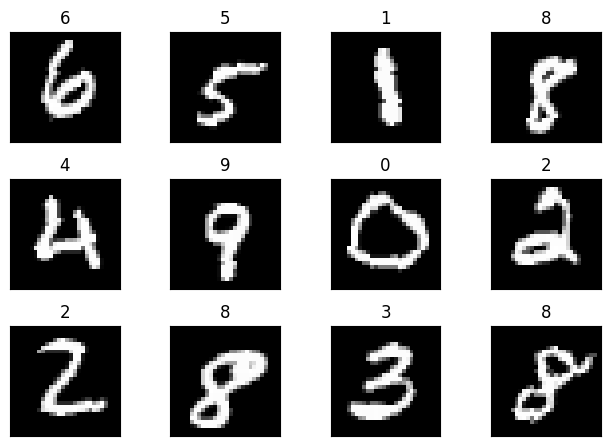

In [7]:
get_utilitites.plot_grid(train_loader)

##### CNN Model summary  <hr>


In [20]:
model = Net().to(device)
summary(model, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 8, 26, 26]              72
       BatchNorm2d-2            [-1, 8, 26, 26]              16
           Dropout-3            [-1, 8, 26, 26]               0
            Conv2d-4           [-1, 16, 24, 24]           1,152
       BatchNorm2d-5           [-1, 16, 24, 24]              32
           Dropout-6           [-1, 16, 24, 24]               0
         MaxPool2d-7           [-1, 16, 12, 12]               0
            Conv2d-8            [-1, 8, 12, 12]             128
       BatchNorm2d-9            [-1, 8, 12, 12]              16
          Dropout-10            [-1, 8, 12, 12]               0
           Conv2d-11           [-1, 16, 10, 10]           1,152
      BatchNorm2d-12           [-1, 16, 10, 10]              32
          Dropout-13           [-1, 16, 10, 10]               0
        MaxPool2d-14             [-1, 1

Model training

---


In [21]:
# variable for model and training
num_epochs = 15
optimizer = optim.SGD(model.parameters(), lr=0.08, momentum=0.9)

scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=8, gamma=0.1, verbose=True)

for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  model_train.train(model, device, train_loader, optimizer)
  model_train.test(model, device, test_loader)
  scheduler.step()

Adjusting learning rate of group 0 to 8.0000e-02.
Epoch 1


Train: Loss=0.1076 Batch_id=234 Accuracy=88.31: 100%|██████████| 235/235 [00:14<00:00, 16.76it/s]


Test set: Average loss: 0.0909, Accuracy: 9718/10000 (97.18%)

Adjusting learning rate of group 0 to 8.0000e-02.
Epoch 2


Train: Loss=0.0392 Batch_id=234 Accuracy=96.56: 100%|██████████| 235/235 [00:14<00:00, 16.61it/s]


Test set: Average loss: 0.1155, Accuracy: 9639/10000 (96.39%)

Adjusting learning rate of group 0 to 8.0000e-02.
Epoch 3


Train: Loss=0.0991 Batch_id=234 Accuracy=97.34: 100%|██████████| 235/235 [00:13<00:00, 17.14it/s]


Test set: Average loss: 0.0527, Accuracy: 9830/10000 (98.30%)

Adjusting learning rate of group 0 to 8.0000e-02.
Epoch 4


Train: Loss=0.1300 Batch_id=234 Accuracy=97.66: 100%|██████████| 235/235 [00:13<00:00, 17.00it/s]


Test set: Average loss: 0.0581, Accuracy: 9811/10000 (98.11%)

Adjusting learning rate of group 0 to 8.0000e-02.
Epoch 5


Train: Loss=0.0811 Batch_id=234 Accuracy=97.83: 100%|██████████| 235/235 [00:13<00:00, 16.98it/s]


Test set: Average loss: 0.0490, Accuracy: 9856/10000 (98.56%)

Adjusting learning rate of group 0 to 8.0000e-02.
Epoch 6


Train: Loss=0.1230 Batch_id=234 Accuracy=98.06: 100%|██████████| 235/235 [00:13<00:00, 16.99it/s]


Test set: Average loss: 0.0599, Accuracy: 9809/10000 (98.09%)

Adjusting learning rate of group 0 to 8.0000e-02.
Epoch 7


Train: Loss=0.0677 Batch_id=234 Accuracy=98.15: 100%|██████████| 235/235 [00:13<00:00, 17.22it/s]


Test set: Average loss: 0.0378, Accuracy: 9882/10000 (98.82%)

Adjusting learning rate of group 0 to 8.0000e-02.
Epoch 8


Train: Loss=0.0936 Batch_id=234 Accuracy=98.14: 100%|██████████| 235/235 [00:13<00:00, 16.99it/s]


Test set: Average loss: 0.0397, Accuracy: 9872/10000 (98.72%)

Adjusting learning rate of group 0 to 8.0000e-03.
Epoch 9


Train: Loss=0.0060 Batch_id=234 Accuracy=98.41: 100%|██████████| 235/235 [00:14<00:00, 16.78it/s]


Test set: Average loss: 0.0313, Accuracy: 9900/10000 (99.00%)

Adjusting learning rate of group 0 to 8.0000e-03.
Epoch 10


Train: Loss=0.0152 Batch_id=234 Accuracy=98.50: 100%|██████████| 235/235 [00:13<00:00, 17.10it/s]


Test set: Average loss: 0.0306, Accuracy: 9910/10000 (99.10%)

Adjusting learning rate of group 0 to 8.0000e-03.
Epoch 11


Train: Loss=0.0364 Batch_id=234 Accuracy=98.55: 100%|██████████| 235/235 [00:13<00:00, 17.05it/s]


Test set: Average loss: 0.0276, Accuracy: 9912/10000 (99.12%)

Adjusting learning rate of group 0 to 8.0000e-03.
Epoch 12


Train: Loss=0.1224 Batch_id=234 Accuracy=98.54: 100%|██████████| 235/235 [00:13<00:00, 17.21it/s]


Test set: Average loss: 0.0289, Accuracy: 9912/10000 (99.12%)

Adjusting learning rate of group 0 to 8.0000e-03.
Epoch 13


Train: Loss=0.0277 Batch_id=234 Accuracy=98.49: 100%|██████████| 235/235 [00:13<00:00, 16.92it/s]


Test set: Average loss: 0.0279, Accuracy: 9914/10000 (99.14%)

Adjusting learning rate of group 0 to 8.0000e-03.
Epoch 14


Train: Loss=0.1069 Batch_id=234 Accuracy=98.56: 100%|██████████| 235/235 [00:13<00:00, 17.00it/s]


Test set: Average loss: 0.0273, Accuracy: 9916/10000 (99.16%)

Adjusting learning rate of group 0 to 8.0000e-03.
Epoch 15


Train: Loss=0.0166 Batch_id=234 Accuracy=98.59: 100%|██████████| 235/235 [00:13<00:00, 16.92it/s]


Test set: Average loss: 0.0285, Accuracy: 9914/10000 (99.14%)

Adjusting learning rate of group 0 to 8.0000e-03.


Plot the Loss/Accuracy for Train/Test dataset

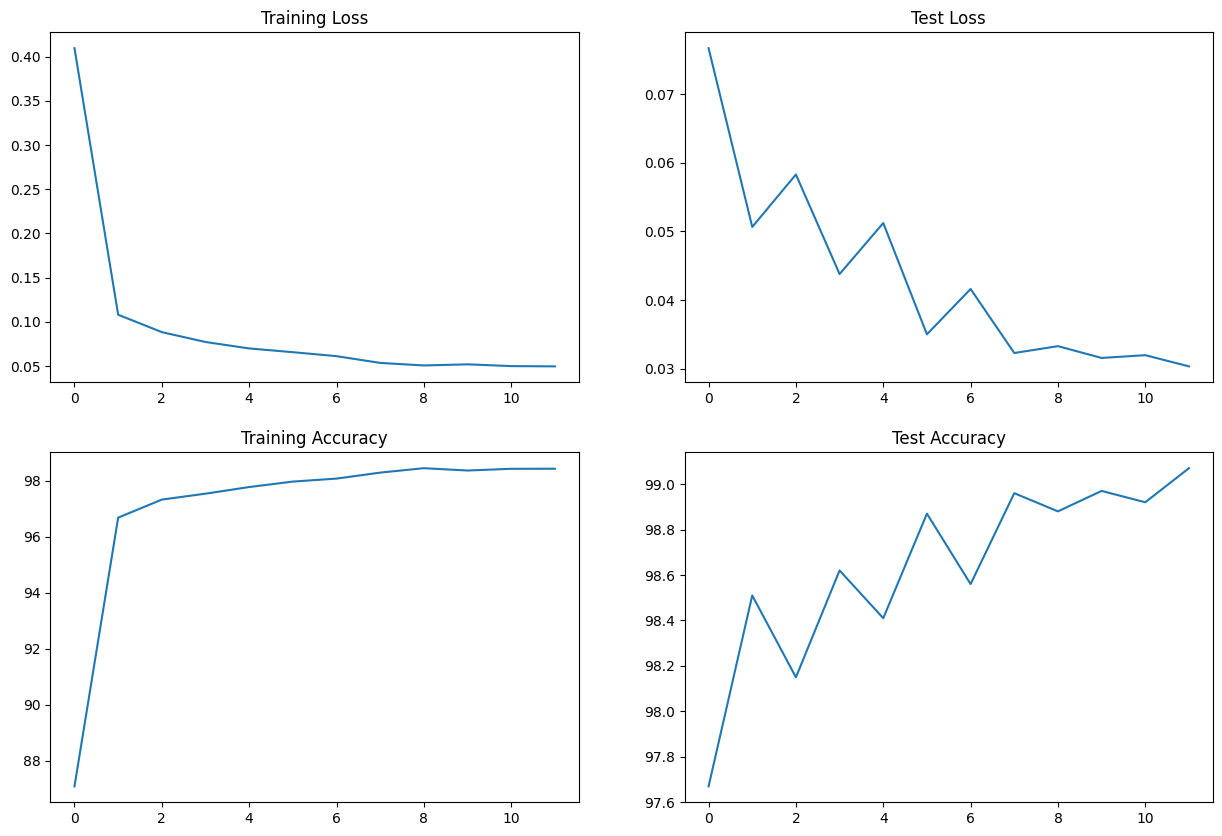

In [11]:
# CODE MOVED TO UTILS.PY

model_train.plot_loss_accuracy()